## Simulating the spin model:

In [40]:
import statsmodels.api as sm

In [1]:
from ising_utils import *

In [13]:
def bornholdt_field(model, i):
    """Compute the local field at spin i"""
    total_neighbors = np.sum(model.connection_matrix[i] * model.spins)
    magnetization = np.sum(model.spins) / len(model.spins)
    return model.J * total_neighbors - model.alpha * model.spins[i] * magnetization

Running simulation with 1024 spins, J=1, alpha=4, T=1.5, steps=5000
Step 0/5000
Step 500/5000
Step 1000/5000
Step 1500/5000
Step 2000/5000
Step 2500/5000
Step 3000/5000
Step 3500/5000
Step 4000/5000
Step 4500/5000
Simulation finished


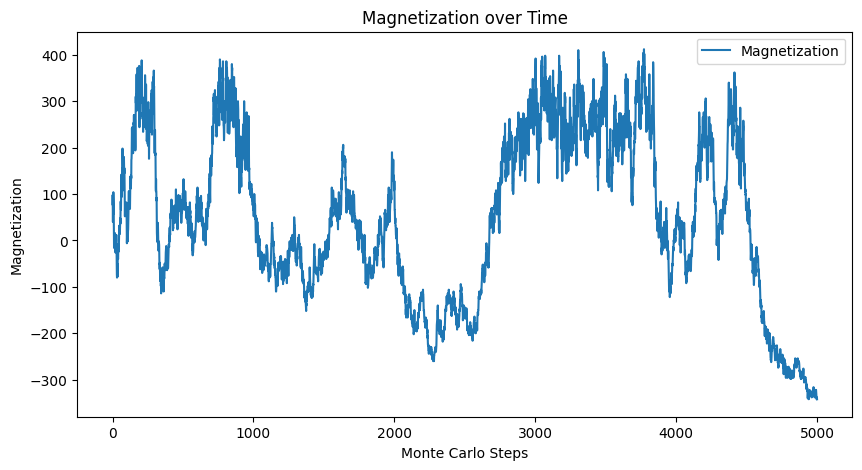

interactive(children=(IntSlider(value=0, description='t', max=4999), Output()), _dom_classes=('widget-interact…

In [14]:
# Running the simulation
model = LatticeSpinMarketModel(side=32, dim=2, J=1, alpha=4, T=1.5, steps=5000, local_field_func=bornholdt_field)
spin_series = model.run_simulation(verbose=True)
model.plot_magnetization(spin_series)
model.plot_lattice(spin_series=spin_series, interactive=True)

In the paper, it is not clear how the logarithmic relative change $\text{ret}(t)=\ln(M(t))-\ln(M(t-1))$ is defined, considering that $M(t)$ can have negative values. We test shifting all its values up by its minimum possible value, and using its absolute value.

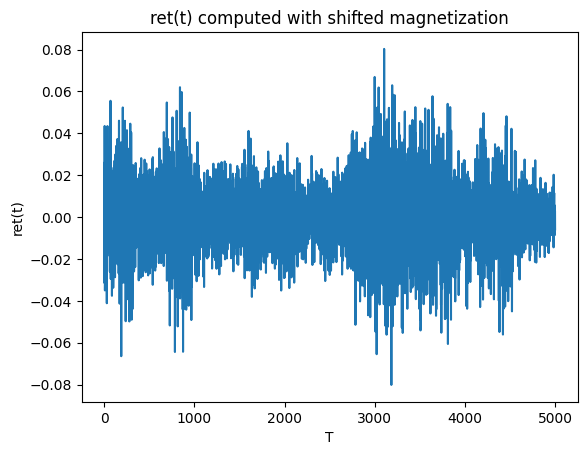

In [34]:
min_magnetization = -32**2

magnetization_series_shifted = [np.sum(spin) - min_magnetization for spin in spin_series]

log_returns = np.diff(np.log(magnetization_series_shifted))

plt.plot(log_returns)
plt.xlabel("T")
plt.ylabel("ret(t)")
plt.title("ret(t) computed with shifted magnetization")
plt.show()

/var/folders/2n/ywnb5cc17zq6c5n2w2n7bkzw0000gn/T/ipykernel_48336/1551916973.py:3: RuntimeWarning: divide by zero encountered in log
  log_returns = np.diff(np.log(abs_magnetization_series))


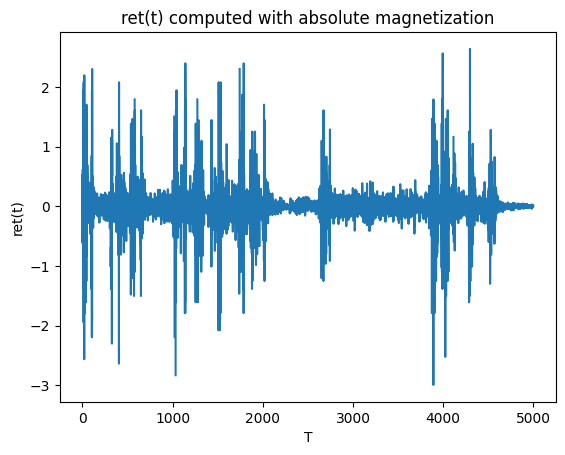

In [35]:
abs_magnetization_series = [abs(np.sum(spin)) for spin in spin_series]

log_returns = np.diff(np.log(abs_magnetization_series))

plt.plot(log_returns)
plt.xlabel("T")
plt.ylabel("ret(t)")
plt.title("ret(t) computed with absolute magnetization")
plt.show()

Qualitatively, the graph corresponding to the absolute value resembles the one in the paper more closely. We will use that one for now. Next, we plot the cumulative distribution of log returns.

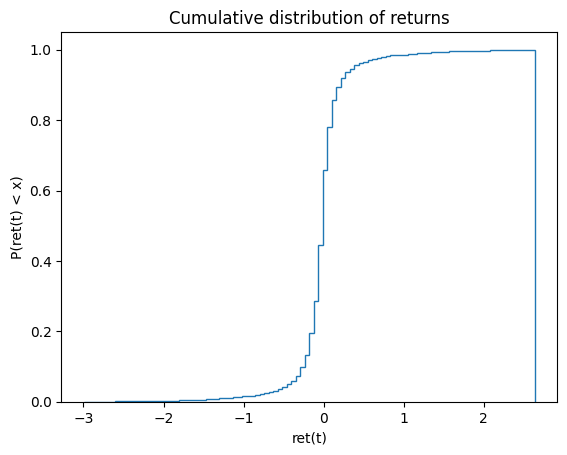

In [38]:
log_returns = log_returns[np.isfinite(log_returns)]

plt.hist(log_returns, bins=100, density=True, cumulative=True, histtype='step')
plt.xlabel("ret(t)")
plt.ylabel("P(ret(t) < x)")
plt.title("Cumulative distribution of returns")
plt.show()

# understand better

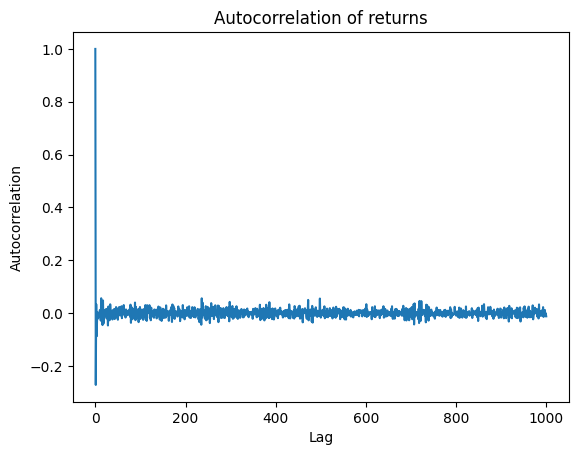

In [49]:
autocorr = sm.tsa.acf(log_returns, nlags=1000)

plt.plot(autocorr)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of returns")
plt.show()

# understand better